<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.


### <div class="license">
<span>Licença CC BY-NC-ND</span>
<span>Carlos Mandele</span>
</div>

# <h1 style="font-size:250%;text-align:center">Data Scraping on the Web:</h1>
* ## <h1 style="font-size:250%;text-align:center">Implementing a web data collection pipeline</h1>
<h4 style="font-size:150%;text-align:center">by Carlos Mandele</h4>
<h5 style="font-size:100%;text-align:center">Data Scientist, in progress</h5>

Implementing a web data collection pipeline

# **Caution**!
## This project is a small demonstration of data collection on the web for research and/or educational purposes.

## Importing Python libraries

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from bs4 import BeautifulSoup
import matplotlib
import requests
import html
import bs4
import scipy

# «sys», library, used only to obtain version numbers
import sys

# Enables the display of graphics on the Jupyter Notebook page
%matplotlib inline

# Importing IPython to check its version and display content in the notebook jupyter
import IPython

print("Imported Python libraries")

Imported Python libraries


In [3]:
# Checking versions of imported Python libraries
print('Python version: ',sys.version)
print('IPython Version: ',IPython.__version__)
print('NumPy version: ',np.__version__)
print('Matplotlib version: ',matplotlib.__version__)
print('SciPy version: ',scipy.__version__)
print('Pandas version: ',pd.__version__)
print('BeautifulSoup version: ',bs4.__version__)
print('Seaborn version: ',sb.__version__)
print('Requests version: ',requests.__version__)

Python version:  3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
IPython Version:  7.34.0
NumPy version:  1.23.5
Matplotlib version:  3.7.1
SciPy version:  1.10.1
Pandas version:  1.5.3
BeautifulSoup version:  4.11.2
Seaborn version:  0.12.2
Requests version:  2.31.0


# Acquisition of data...

### Data scraping source/site : https://db-engines.com/en/ranking

In [ ]:
#Page inspection and collection
html=requests.get("https://db-engines.com/en/ranking").content

#variable containing an html parsator
cracker=BeautifulSoup(html, 'html5lib')

### Searching all liks'tag a'

In [ ]:
todos_links=cracker.find_all('a')
todos_links

[<a href="https://db-engines.com/en/"><img alt="DB-Engines" border="0" height="64" src="https://db-engines.com/db-engines.png" width="231"/></a>,
 <a href="https://www.mcobject.com/?pmc=dbe" rel="sponsored"><img alt="ExtremeDB: the mission critical dbms" border="0" height="90" src="//db-engines.com/pictures/extremedb_2023-06-14.jpg" width="616"/></a>,
 <a href="https://db-engines.com/de/ranking">Deutsch</a>,
 <a href="https://solid-it.at/">solid IT</a>,
 <a href="https://db-engines.com/en/">Home</a>,
 <a href="https://db-engines.com/en/ranking">DB-Engines Ranking</a>,
 <a href="https://db-engines.com/en/systems">Systems</a>,
 <a href="https://db-engines.com/en/articles">Encyclopedia</a>,
 <a href="https://db-engines.com/en/blog">Blog</a>,
 <a href="https://db-engines.com/en/sponsors">Sponsors</a>,
 <a href="https://db-engines.com/en/search">Search</a>,
 <a href="https://db-engines.com/en/user_login">Vendor Login</a>,
 <a href="https://mariadb.com/products/skysql/get-started/?utm_campai

### Inspecting tables and extracting data from the table "419 systems in ranking, July 2023".

In [ ]:
tabela=cracker.find('table' ,{'class':'dbi'}).find('tbody')
tabela

<tbody><tr><td colspan="99">419 systems in ranking, July 2023</td></tr><tr><td class="dbi_header" colspan="3" style="text-align:center">Rank</td><th class="dbi_header pad-l" rowspan="2" style="border-left:1px solid #aaa">DBMS</th><th class="dbi_header pad-r" rowspan="2" style="border-right:1px solid #aaa">Database Model</th><td class="dbi_header" colspan="3" style="text-align:center">Score</td></tr><tr style="line-height:100%;"><td class="dbi_header small">Jul<br/>2023</td><td class="dbi_header small">Jun<br/>2023</td><td class="dbi_header small pad-r">Jul<br/>2022</td><td class="dbi_header small pad-l">Jul<br/>2023</td><td class="dbi_header small">Jun<br/>2023</td><td class="dbi_header small">Jul<br/>2022</td></tr><tr><td>1.</td><td class="small">1.</td><td class="small pad-r">1.</td><th class="pad-l"><a href="https://db-engines.com/en/system/Oracle">Oracle <span class="info"><img alt="detailed information" height="16" src="https://db-engines.com/moreattributes.png" width="16"/><span 

In [ ]:
#Next i pass a function that searches the variabe "table" all rows('tr')
linhas=tabela.find_all( 'tr' )
contalinhas=0

#Creating two lists, one for banks and one for scores
base=[]
score=[]
for linha in linhas:
    contalinhas+=1
    if contalinhas>3:
        data=linha.find_all('td')
        data2=linha.find('a')
        score.append(float(data[3].text))
        #When searching for the data of the link, it is notced that it assembles an array with the information, where the first (0) is the name of the bank
        base.append(data2.contents[0])


In [ ]:
#It is now possible to gererate a DtaFrame with  the list of Ranking databases
dataset=pd.DataFrame(base,columns=["Banco"])
dataset["Pontos"]=score


In [ ]:
dataset

,Banco,Pontos
0,Oracle,1256.01
1,MySQL,1150.35
2,Microsoft SQL Server,921.60
3,PostgreSQL,617.83
4,MongoDB,435.49
...,...,...
414,Sadas Engine,0.00
415,searchxml,0.00
416,SpaceTime,0.00
417,Tkrzw,0.00


<Axes: xlabel='Banco', ylabel='Pontos'>

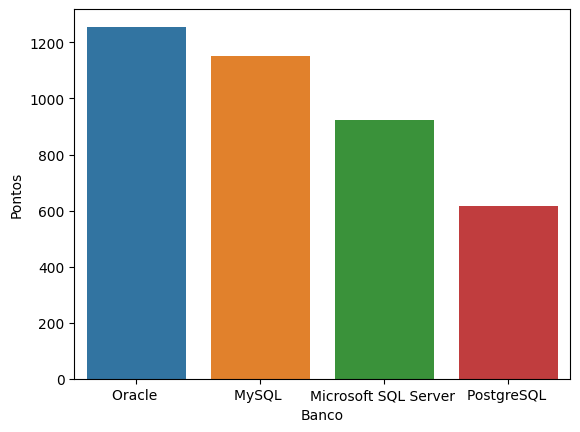

In [ ]:
#I can alson generate some column charts, indicating the name of bank and the amount of bank points in the current month
sb.barplot(data=dataset.head(4), x='Banco', y='Pontos')


### I can also generate a new Dataframe with only the top 10 positions in the list, create a Share field (percentage of relevance of each Database in relation to the 10 listed, based on the amount of points they have), Informing what is the percentage and the name of the bank that appears first.

In [ ]:
df2=dataset.head(10)
df2


,Banco,Pontos
0,Oracle,1256.01
1,MySQL,1150.35
2,Microsoft SQL Server,921.60
3,PostgreSQL,617.83
4,MongoDB,435.49
5,Redis,163.76
6,IBM Db2,139.81
7,Elasticsearch,139.59
8,Microsoft Access,130.72
9,SQLite,130.20


In [ ]:
total=df2['Pontos'].sum()
total = df2['share']=df2['Pontos']/total*100
total

<ipython-input-11-1aed84039aad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total = df2['share']=df2['Pontos']/total*100


0    24.698546
1    22.620817
2    18.122611
3    12.149189
4     8.563602
5     3.220224
6     2.749265
7     2.744938
8     2.570516
9     2.560291
Name: Pontos, dtype: float64

### **Note**: Note that the first bank "Oracle" has 24.62% of the share (among the top 10). This data was collected in July 2023, on another date will be different values.

### Using MatPlotLib I generated a graph based on the Share of each bank in relation to the other 9 of the previous generated list ('df2')

<function matplotlib.pyplot.show(close=None, block=None)>

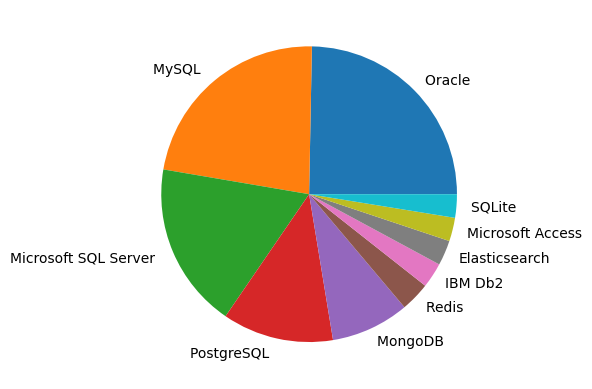

In [ ]:
plt.pie(df2['share'], labels=df2['Banco'])
plt.show


### Using the full Dataframe, you can create and insert a Share column stating the percentage of relevance of each bank in relation to the others.

In [ ]:
total=dataset['Pontos'].sum()
dataset['Share']=dataset['Pontos']/total*100
dataset

,Banco,Pontos,Share
0,Oracle,1256.01,17.313076
1,MySQL,1150.35,15.856639
2,Microsoft SQL Server,921.60,12.703506
3,PostgreSQL,617.83,8.516284
4,MongoDB,435.49,6.002875
...,...,...,...
414,Sadas Engine,0.00,0.000000
415,searchxml,0.00,0.000000
416,SpaceTime,0.00,0.000000
417,Tkrzw,0.00,0.000000


#### Finally with the DataFrame generated earlier, i will generate two files of type csv, json and i will call them "db-ranking"

## Conclusion

The Web stores vast amounts of data useful for research. It is an important source of data that is largely responsible for advancing data science and artificial intelligence. Scraping consists of an application capable of requesting a web server, requesting data, analyzing and extracting the necessary information. Web scraping activity is usually an alternative when there are no other ways (e.g. an API) to mine data needed by a project. However, in most cases it is also the practice of speeding up a process that was previously done manually. On the other hand, often public databases are not available to be consumed, however the information is available through access to Web pages and Scraping works very well for this type of proposal.
* ## **Warning**
When practicing Web Scraping always remember to observe data protection laws, as not all data that is public can be consumed and used.


In [1]:
print("Completed project")

Completed project
